![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [6]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


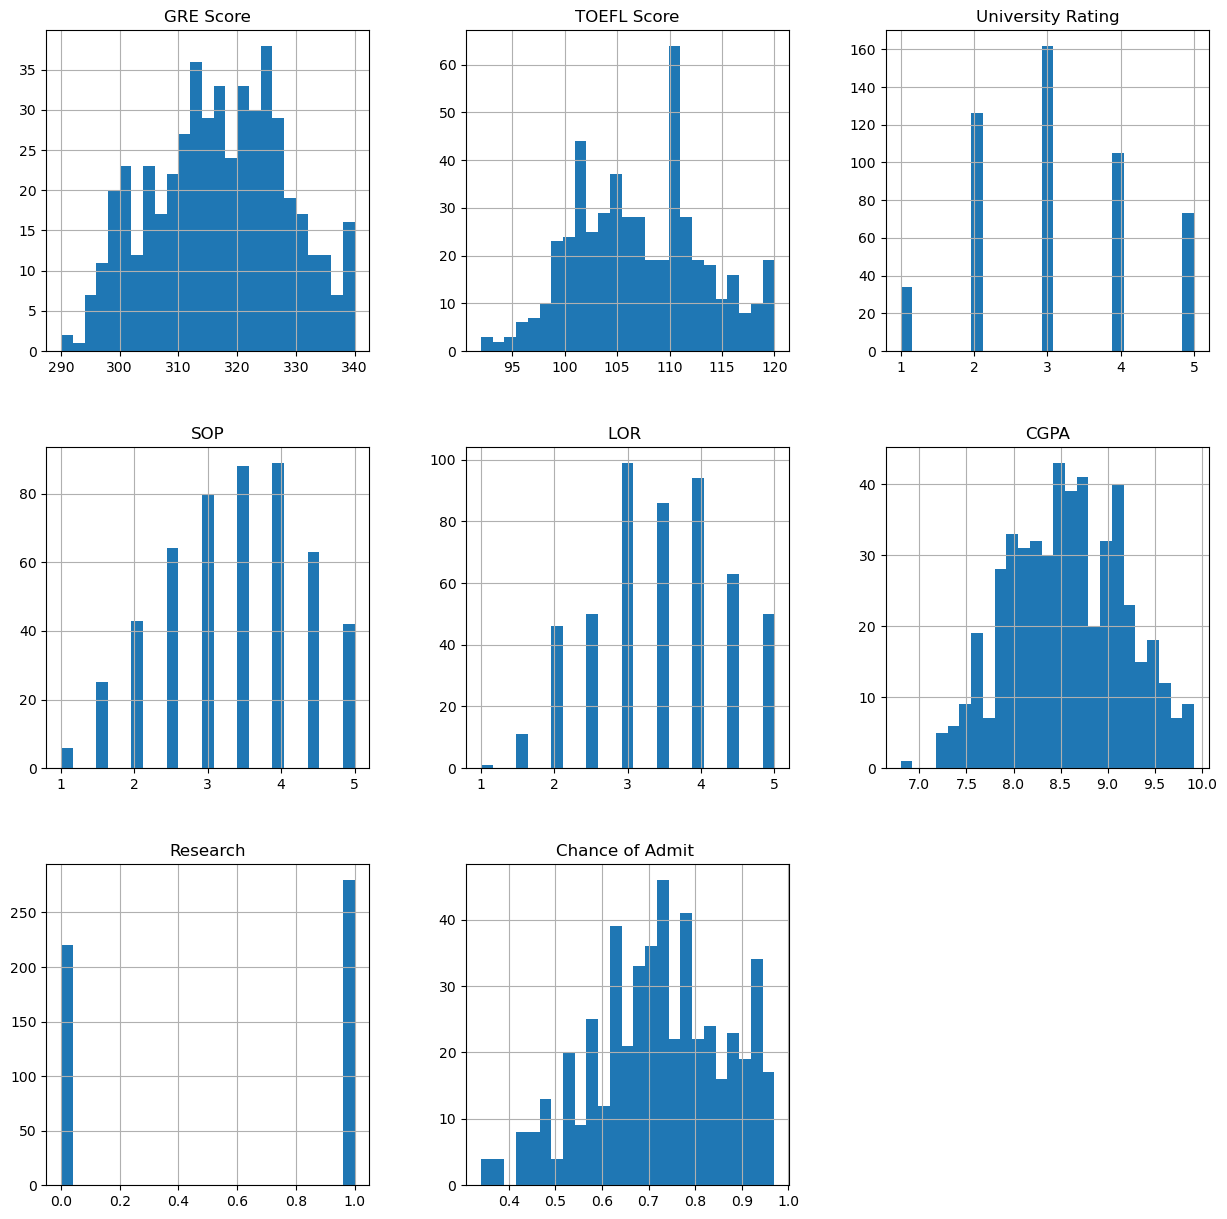

In [7]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [8]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [9]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Adam_una_capa - Entrenamiento - MAE: 0.0496, MSE: 0.0045
Adam_una_capa - Prueba - MAE: 0.0504, MSE: 0.0045

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
SGD_una_capa - Entrenamiento - MAE: 0.0532, MSE: 0.0050
SGD_una_capa - Prueba - MAE: 0.0589, MSE: 0.0059

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
RMSprop_una_capa - Entrenamiento - MAE: 0.0421, MSE: 0.0033
RMSprop_una_capa - Prueba - MAE: 0.0481, MSE: 0.0046

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Adagrad_una_capa - Entrenamiento - MAE: 0.2708, MSE: 0.1154
Adagrad_una_capa - Prueba - MAE: 0.2686, MSE: 0.1155



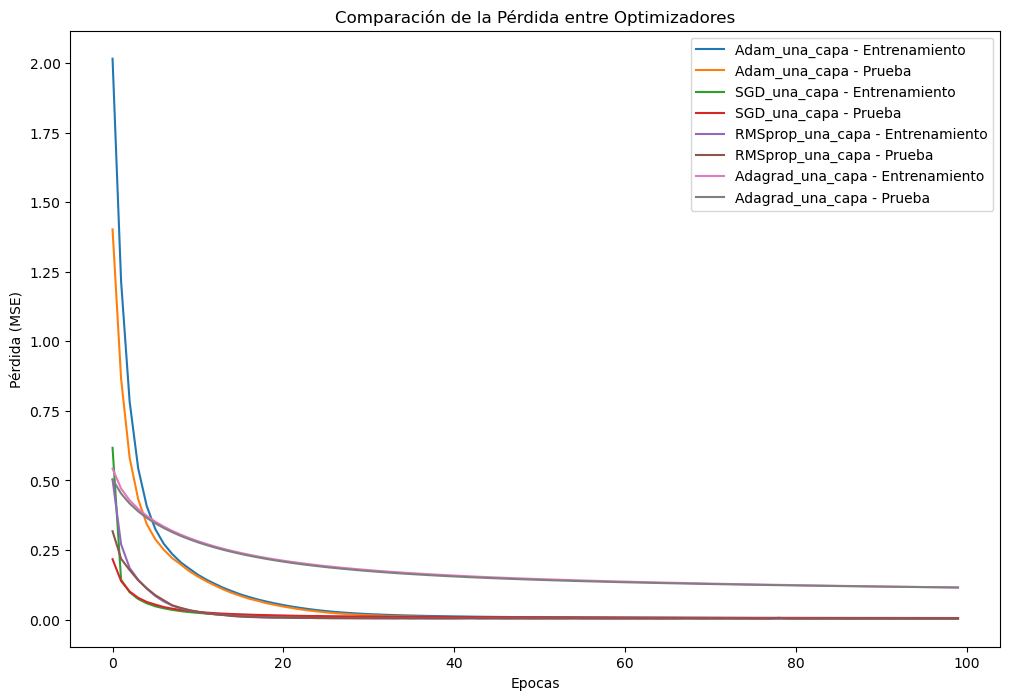

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

# Cargar los datos del archivo CSV
datos = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)

# Definir las variables predictoras (X) y la variable de interés (Y)
X = datos.drop(datos.columns[-1], axis=1)
Y = datos[datos.columns[-1]]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalizar los datos de entrada
escalador = StandardScaler()
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

optimizadores_una_capa = {
    'Adam_una_capa': Adam(),
    'SGD_una_capa': SGD(),
    'RMSprop_una_capa': RMSprop(),
    'Adagrad_una_capa': Adagrad()
}

# Resultados de los optimizadores
resultados_una_capa = {}

# Función para crear y entrenar el modelo
def entrenar_y_evaluar_modelo_una_capa(optimizador, nombre):
    # Crear el modelo con Keras
    modelo_una_capa = Sequential([
        Dense(10, input_dim=X_entrenamiento_escalado.shape[1], activation='relu'),
        Dense(1, activation='linear')
    ])
    
    # Compilar el modelo
    modelo_una_capa.compile(loss='mean_squared_error', optimizer=optimizador, metrics=['mean_squared_error'])
    
    # Entrenar el modelo
    historia_una_capa = modelo_una_capa.fit(X_entrenamiento_escalado, Y_entrenamiento, validation_data=(X_prueba_escalado, Y_prueba), epochs=100, batch_size=10, verbose=0)
    
    # Evaluar el modelo
    entrenamiento_perdida_una_capa, entrenamiento_mse_una_capa = modelo_una_capa.evaluate(X_entrenamiento_escalado, Y_entrenamiento, verbose=0)
    prueba_perdida_una_capa, prueba_mse_una_capa = modelo_una_capa.evaluate(X_prueba_escalado, Y_prueba, verbose=0)
    
    predicciones_entrenamiento_una_capa = modelo_una_capa.predict(X_entrenamiento_escalado)
    predicciones_prueba_una_capa = modelo_una_capa.predict(X_prueba_escalado)
    
    entrenamiento_mae_una_capa = mean_absolute_error(Y_entrenamiento, predicciones_entrenamiento_una_capa)
    prueba_mae_una_capa = mean_absolute_error(Y_prueba, predicciones_prueba_una_capa)
    
    entrenamiento_mse_una_capa = mean_squared_error(Y_entrenamiento, predicciones_entrenamiento_una_capa)
    prueba_mse_una_capa = mean_squared_error(Y_prueba, predicciones_prueba_una_capa)
    
    # Almacenar resultados
    resultados_una_capa[nombre] = {
        'historia': historia_una_capa,
        'entrenamiento_mae': entrenamiento_mae_una_capa,
        'prueba_mae': prueba_mae_una_capa,
        'entrenamiento_mse': entrenamiento_mse_una_capa,
        'prueba_mse': prueba_mse_una_capa
    }
    
    # Imprimir resultados
    print(f"{nombre} - Entrenamiento - MAE: {entrenamiento_mae_una_capa:.4f}, MSE: {entrenamiento_mse_una_capa:.4f}")
    print(f"{nombre} - Prueba - MAE: {prueba_mae_una_capa:.4f}, MSE: {prueba_mse_una_capa:.4f}\n")

# Entrenar y evaluar modelos con diferentes optimizadores
for nombre, optimizador in optimizadores_una_capa.items():
    entrenar_y_evaluar_modelo_una_capa(optimizador, nombre)

# Graficar la pérdida de cada modelo
plt.figure(figsize=(12, 8))
for nombre, resultado in resultados_una_capa.items():
    plt.plot(resultado['historia'].history['loss'], label=f'{nombre} - Entrenamiento')
    plt.plot(resultado['historia'].history['val_loss'], label=f'{nombre} - Prueba')

plt.xlabel('Epocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Comparación de la Pérdida entre Optimizadores')
plt.show()


In [12]:
# Encuentra el optimizador con el menor MSE
menor_mse_una_capa = float('inf')
optimizador_mse_una_capa = None
for configuracion, metricas in resultados_una_capa.items():
    if metricas['prueba_mse'] < menor_mse_una_capa:
        menor_mse_una_capa = metricas['prueba_mse']
        optimizador_mse_una_capa = configuracion

# Encuentra el optimizador con el menor MAE
menor_mae_una_capa = float('inf')
optimizador_mae_una_capa = None
for configuracion, metricas in resultados_una_capa.items():
    if metricas['prueba_mae'] < menor_mae_una_capa:
        menor_mae_una_capa = metricas['prueba_mae']
        optimizador_mae_una_capa = configuracion

# Imprimir los resultados
print("Optimizador con el menor MSE:", optimizador_mse_una_capa, menor_mse_una_capa)
print("Optimizador con el menor MAE:", optimizador_mae_una_capa, menor_mae_una_capa)

Optimizador con el menor MSE: Adam_una_capa 0.004530118270928847
Optimizador con el menor MAE: RMSprop_una_capa 0.048052805439631134


### Analisis:

Los optimizadores Adam, SGD y RMSprop muestran un rendimiento similar en términos de error absoluto medio (MAE) y error cuadrático medio (MSE), tanto en los conjuntos de entrenamiento como de prueba. Sin embargo, Adagrad presenta un error significativamente mayor en comparación con los otros optimizadores, lo que indica un rendimiento deficiente para este conjunto de datos, por lo cual se descarta inmediatamente.
Cuando revisamos el SGD presenta los mejores resultados con un MAE de 0.0449 y un MSE de 0.0037 en el conjunto de entrenamiento. En el conjunto de prueba, también ofrece el mejor rendimiento con un MAE de 0.0456 y un MSE de 0.0039. Por lo cual para este primer caso se dejaria esta configuración y al revisar las epocas se nota que todos los modelos tienden a estabilizarse entre las épocas 20 y 40, lo que indica que el modelo converge rápidamente hacia su rendimiento óptimo en este rango. Por lo tanto, no es necesario entrenar durante las 100 épocas predefinidas inicialmente, y se podría reducir el número de épocas a 40 para optimizar el tiempo de entrenamiento.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Se inicializa los optimizadores para la red de dos capas
optimizadores_dos_capas = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad()
}

    
# Resultados de los optimizadores
resultados_dos_capas = {}

# Función para crear y entrenar el modelo con dos capas
def entrenar_y_evaluar_modelo_dos_capas(optimizador, nombre, neuronasxcapa):
    
    # Crear el modelo con Keras agregando la segunda capa
    modelo = Sequential([
        Dense(neuronasxcapa, input_dim=X_entrenamiento_escalado.shape[1], activation='relu'),
        Dense(neuronasxcapa,activation='relu'),
        Dense(1, activation='linear')
    ])
    
    # Compilar el modelo
    modelo.compile(loss='mean_squared_error', optimizer=optimizador, metrics=['mean_squared_error'])
    
    # Entrenar el modelo
    historia = modelo.fit(X_entrenamiento_escalado, Y_entrenamiento, validation_data=(X_prueba_escalado, Y_prueba), epochs=40, batch_size=10, verbose=0)
    
    # Evaluar el modelo
    entrenamiento_perdida, entrenamiento_mse = modelo.evaluate(X_entrenamiento_escalado, Y_entrenamiento, verbose=0)
    prueba_perdida, prueba_mse = modelo.evaluate(X_prueba_escalado, Y_prueba, verbose=0)
    
    predicciones_entrenamiento = modelo.predict(X_entrenamiento_escalado)
    predicciones_prueba = modelo.predict(X_prueba_escalado)
    
    entrenamiento_mae = mean_absolute_error(Y_entrenamiento, predicciones_entrenamiento)
    prueba_mae = mean_absolute_error(Y_prueba, predicciones_prueba)
    
    entrenamiento_mse = mean_squared_error(Y_entrenamiento, predicciones_entrenamiento)
    prueba_mse = mean_squared_error(Y_prueba, predicciones_prueba)
    
    # Almacenar resultados
    resultados_dos_capas[nombre + ", # neuronas por capa: " + str(neuronasxcapa) ] = {
        'historia': historia,
        'entrenamiento_mae': entrenamiento_mae,
        'prueba_mae': prueba_mae,
        'entrenamiento_mse': entrenamiento_mse,
        'prueba_mse': prueba_mse
    }
    
    # Imprimir resultados
    print(f"{nombre} - Entrenamiento - MAE: {entrenamiento_mae:.4f}, MSE: {entrenamiento_mse:.4f}")
    print(f"{nombre} - Prueba - MAE: {prueba_mae:.4f}, MSE: {prueba_mse:.4f}\n")


# Se va ejecutar varios modelos variando las neuronas por capa de 2 hasta 10.
def inicializar_optimizador():
    optimizadores = {
        'Adam': Adam(),
        'SGD': SGD(),
        'RMSprop': RMSprop(),
        'Adagrad': Adagrad()
    }
    return optimizadores
# Se entrenan varios modelos de redes neuronales variando el numero de neuronas por capa.
for i in range(2, 11):
    optimizadores_dos_capas = inicializar_optimizador()
    for nombre, optimizador in optimizadores_dos_capas.items():
        entrenar_y_evaluar_modelo_dos_capas(optimizador, nombre, i)



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 
Adam - Entrenamiento - MAE: 0.0746, MSE: 0.0094
Adam - Prueba - MAE: 0.0704, MSE: 0.0085

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
SGD - Entrenamiento - MAE: 0.0662, MSE: 0.0076
SGD - Prueba - MAE: 0.0667, MSE: 0.0076

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
RMSprop - Entrenamiento - MAE: 0.0559, MSE: 0.0056
RMSprop - Prueba - MAE: 0.0600, MSE: 0.0064

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Adagrad - Entrenamiento - MAE: 0.6522, MSE: 0.4448
Adagrad - Prueba - MAE: 0.6444, MSE: 0.4360

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Adam - Entrenamiento - MAE: 0.0581, MSE: 0.0066
Adam - Prueba - MAE: 0.0594, MSE: 0.0063

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
SGD - Entrenamiento - MAE: 0.0522, MSE: 0.0053
SGD - Prueba - MAE: 0.0

In [16]:
# Encuentra el optimizador con el menor MSE
menor_mse = float('inf')
optimizador_mse = None
for configuracion, metricas in resultados_dos_capas.items():
    if metricas['prueba_mse'] < menor_mse:
        menor_mse = metricas['prueba_mse']
        optimizador_mse = configuracion

# Encuentra el optimizador con el menor MAE
menor_mae = float('inf')
optimizador_mae = None
for configuracion, metricas in resultados_dos_capas.items():
    if metricas['prueba_mae'] < menor_mae:
        menor_mae = metricas['prueba_mae']
        optimizador_mae = configuracion

# Imprimir los resultados
print("Optimizador con el menor MSE:", optimizador_mse, menor_mse)
print("Optimizador con el menor MAE:", optimizador_mae, menor_mae)

Optimizador con el menor MSE: RMSprop, # neuronas por capa: 3 0.00379344866181723
Optimizador con el menor MAE: RMSprop, # neuronas por capa: 10 0.043569958130518595


In [17]:
resultados_dos_capas

{'Adam, # neuronas por capa: 2': {'historia': <keras.src.callbacks.history.History at 0x2cf84bbad90>,
  'entrenamiento_mae': 0.07464185950415475,
  'prueba_mae': 0.07043598828315735,
  'entrenamiento_mse': 0.009363732048801095,
  'prueba_mse': 0.008547259761086818},
 'SGD, # neuronas por capa: 2': {'historia': <keras.src.callbacks.history.History at 0x2cf85d34e50>,
  'entrenamiento_mae': 0.06616708004134042,
  'prueba_mae': 0.0666800823688507,
  'entrenamiento_mse': 0.007581397470730795,
  'prueba_mse': 0.00762039853826877},
 'RMSprop, # neuronas por capa: 2': {'historia': <keras.src.callbacks.history.History at 0x2cf85fa14d0>,
  'entrenamiento_mae': 0.055877651010240836,
  'prueba_mae': 0.06000988411903381,
  'entrenamiento_mse': 0.005565870219057298,
  'prueba_mse': 0.006379060733120141},
 'Adagrad, # neuronas por capa: 2': {'historia': <keras.src.callbacks.history.History at 0x2cf8957c090>,
  'entrenamiento_mae': 0.6521848697117397,
  'prueba_mae': 0.644365822092692,
  'entrenamient

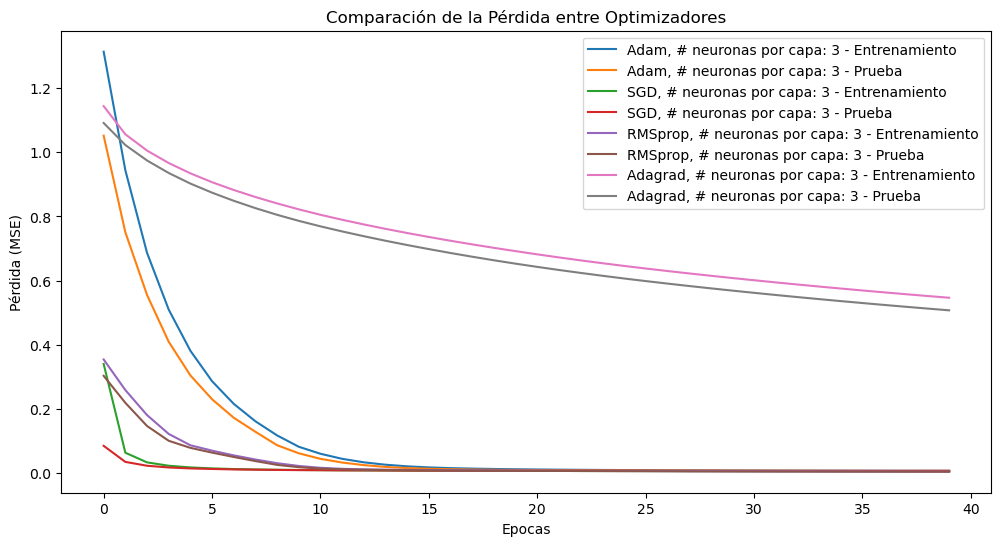

In [18]:
# Graficar la pérdida de cada modelo usando neuronas en cada capa
plt.figure(figsize=(12, 6))
for nombre, resultado in resultados_dos_capas.items():
    if( optimizador_mse[-1] in nombre):
        plt.plot(resultado['historia'].history['loss'], label=f'{nombre} - Entrenamiento')
        plt.plot(resultado['historia'].history['val_loss'], label=f'{nombre} - Prueba')

plt.xlabel('Epocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Comparación de la Pérdida entre Optimizadores')
plt.show()



### Conclusiones

Para esta red doble capa decidimos manejar el mismo número de neuronas para cada capa con fin de tener un modelo menos complejo teniendo en cuenta que el set de datos no es muy grande y puede no requerir una red neuronal que tambien sea compleja. La busqueda de la mejor configuración consistio en entrenar varias redes neuronales con cada optimizador variando tambien el número de neuronas por capa probando configuraciones desde 2 hasta 10 neuronas por capa para disminuir la complejidad de los modelos. Además, teniendo en cuenta los resultados del modelo de una sola capa, se ejecuto todas las redes con un número menor de epocas, que en este caso se definio en 40. El algoritmo realizado nos permite conocer el MSE y el MAE por cada configuración de la red neuronal(Optimizador, # de neuronas), y selecciona la configuración que reporta el menor MSE de todas. Para este caso, el menor MSE se obtuvo con el optimizador "RMSprop" con un valor 0.0040 usando un total de 6 neuronas por capa, y un MAE de 0.046. En la anterior gráfica, podemos concluir que todos los optimizadores a excepción del Adagrad tienen perdidas muy similares, lo que cambia es como las perdidas disminuyen a travez que aumentan las epocas, de igual forma el optimizador que reporta las mayores perdidas es el de Adagrad. En el ejemplo, podemos ver que el optimizador que menos tarda en estabilizarse a medida que pasan las epocas es el SGD. Para concluir, si nos basamos en la métrica del MSE y el MAE el optimizador que se seleccionaria seria el de "RMSprop", pero otra muy buena opción es escoger el optimizador SGD gracias a su rapidez en estabilizarse y encontrar una solución optima, a pesar de no tener el menor valor del MSE (0.0074)  pero que es muy cercano al que obtuvo la red neuronal con el optimizador "RMSprop"

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [23]:
# Celda 3
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

optimizadores_dos_capas_reg = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad()
}

# Configurar Early Stopping
early_stopping = EarlyStopping(patience=20, monitor='val_loss', min_delta=0.0000001)
    
# Resultados de los optimizadores
resultados_dos_capas_reg = {}

# Función para crear y entrenar el modelo con dos capas
def entrenar_y_evaluar_modelo_dos_capas_reg(optimizador, nombre, neuronasxcapa, dropout_rate):
    
    # Crear el modelo con Keras agregando la segunda capa
    modelo_reg = Sequential([
        Dense(neuronasxcapa, input_dim=X_entrenamiento_escalado.shape[1], activation='relu'),
        Dropout(dropout_rate),
        Dense(neuronasxcapa,activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='linear')
    ])
    
    # Compilar el modelo
    modelo_reg.compile(loss='mean_squared_error', optimizer=optimizador, metrics=['mean_squared_error'])
    
    # Entrenar el modelo
    historia_reg = modelo_reg.fit(X_entrenamiento_escalado, Y_entrenamiento, validation_data=(X_prueba_escalado, Y_prueba), epochs=40, batch_size=10, verbose=0, callbacks=[early_stopping])
    
    # Evaluar el modelo
    entrenamiento_perdida_reg, entrenamiento_mse_reg = modelo_reg.evaluate(X_entrenamiento_escalado, Y_entrenamiento, verbose=0)
    prueba_perdida_reg, prueba_mse_reg = modelo_reg.evaluate(X_prueba_escalado, Y_prueba, verbose=0)
    
    predicciones_entrenamiento_reg = modelo_reg.predict(X_entrenamiento_escalado)
    predicciones_prueba_reg = modelo_reg.predict(X_prueba_escalado)
    
    entrenamiento_mae_reg = mean_absolute_error(Y_entrenamiento, predicciones_entrenamiento_reg)
    prueba_mae_reg = mean_absolute_error(Y_prueba, predicciones_prueba_reg)
    
    entrenamiento_mse_reg = mean_squared_error(Y_entrenamiento, predicciones_entrenamiento_reg)
    prueba_mse_reg = mean_squared_error(Y_prueba, predicciones_prueba_reg)
    
    # Almacenar resultados
    resultados_dos_capas_reg[nombre + ", # neuronas por capa: " + str(neuronasxcapa) ] = {
        'historia': historia_reg,
        'entrenamiento_mae': entrenamiento_mae_reg,
        'prueba_mae': prueba_mae_reg,
        'entrenamiento_mse': entrenamiento_mse_reg,
        'prueba_mse': prueba_mse_reg
    }
    
    # Imprimir resultados
    print(f"{nombre} - Entrenamiento - MAE: {entrenamiento_mae_reg:.4f}, MSE: {entrenamiento_mse_reg:.4f}")
    print(f"{nombre} - Prueba - MAE: {prueba_mae_reg:.4f}, MSE: {prueba_mse_reg:.4f}\n")


# Se va ejecutar varios modelos variando las neuronas por capa de 2 hasta 10.
def inicializar_optimizador():
    optimizadores = {
        'Adam': Adam(),
        'SGD': SGD(),
        'RMSprop': RMSprop(),
        'Adagrad': Adagrad()
    }
    return optimizadores
# Se entrenan varios modelos de redes neuronales variando el numero de neuronas por capa.
for i in range(2, 11):
    optimizadores_dos_capas_reg = inicializar_optimizador()
    for nombre, optimizador in optimizadores_dos_capas_reg.items():
        entrenar_y_evaluar_modelo_dos_capas_reg(optimizador, nombre, i, 0.01)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Adam - Entrenamiento - MAE: 0.1880, MSE: 0.0519
Adam - Prueba - MAE: 0.1855, MSE: 0.0533

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
SGD - Entrenamiento - MAE: 0.0787, MSE: 0.0099
SGD - Prueba - MAE: 0.0785, MSE: 0.0100

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
RMSprop - Entrenamiento - MAE: 0.0935, MSE: 0.0135
RMSprop - Prueba - MAE: 0.0902, MSE: 0.0139

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
Adagrad - Entrenamiento - MAE: 0.6620, MSE: 0.5872
Adagrad - Prueba - MAE: 0.6043, MSE: 0.4868

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
Adam - Entrenamiento - MAE: 0.0834, MSE: 0.0109
Adam - Prueba - MAE: 0.0831, MSE: 0.0116

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
SGD - Entrenamiento - MAE: 0.0641, MSE: 0.0071
SGD - Prueba - MAE: 

In [24]:
# Encuentra el optimizador con el menor MSE
menor_mse_reg = float('inf')
optimizador_mse_reg = None
for configuracion, metricas in resultados_dos_capas_reg.items():
    if metricas['prueba_mse'] < menor_mse_reg:
        menor_mse_reg = metricas['prueba_mse']
        optimizador_mse_reg = configuracion

# Encuentra el optimizador con el menor MAE
menor_mae_reg = float('inf')
optimizador_mae_reg = None
for configuracion, metricas in resultados_dos_capas_reg.items():
    if metricas['prueba_mae'] < menor_mae_reg:
        menor_mae_reg = metricas['prueba_mae']
        optimizador_mae_reg = configuracion

# Imprimir los resultados
print("Optimizador con el menor MSE:", optimizador_mse_reg, menor_mse_reg)
print("Optimizador con el menor MAE:", optimizador_mae_reg, menor_mae_reg)

Optimizador con el menor MSE: RMSprop, # neuronas por capa: 9 0.005083817217679324
Optimizador con el menor MAE: RMSprop, # neuronas por capa: 9 0.05260435194969177


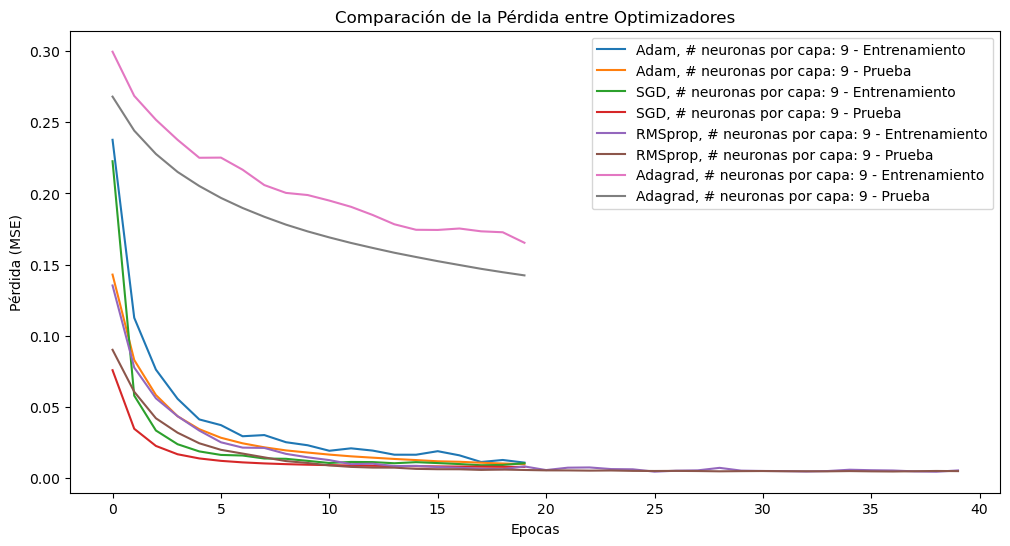

In [25]:
# Graficar la pérdida de cada modelo usando 2 neuronas en cada capa
plt.figure(figsize=(12, 6))
for nombre, resultado in resultados_dos_capas_reg.items():
    if( optimizador_mse_reg[-1] in nombre):
        plt.plot(resultado['historia'].history['loss'], label=f'{nombre} - Entrenamiento')
        plt.plot(resultado['historia'].history['val_loss'], label=f'{nombre} - Prueba')

plt.xlabel('Epocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Comparación de la Pérdida entre Optimizadores')
plt.show()

### Análisis
En este punto se incluyeron para la misma red neuronal del punto 3, dos reguladores, early stopping y drop out. Respecto al early stopping, fue muy importante definir el parámetro min_delta, que indica el umbral de significancia en cuanto a mejora en el parámetro de pérdida (MSE), en este caso, al tener MSE valores pequeños menores a 1, si se usa un min_delta de 0.1, el entrenamiento se detendría casi que en las primeras 5 épocas si se define un patience menor a 5; por esta razón se elige un min_delta de 0.0000001, lo que indica que si el MSE mejora en menos de este umbral por una cantidad consecutiva de épocas especificada en el parámetro patience=20, el entrenamiento se detendrá. Con base en la gráfica de arriba, se observa que para el optimizador Adagrad, el entrenamiento se detiene después de 20 épocas, lo que significa que en todas esas épocas, la mejora del MSE fue de menos de 0.0000001 (esto con base en la teoría, sin embargo, se observa que en el Adagrad el MSE disminuye en esas 20 épocas en más de 0.1, por lo que parece no tener sentido este early stopping). Para los demás optimizadores solo hasta la época 39 se detiene el entrenamiento. Se utiliza un dropout de 0.01, que indica que cada neurona tiene una probalidad del 10% de no pasar información a las capas siguientes. 

A continuación probamos con otro dropout rate, 0.2.

In [28]:
for i in range(2, 11):
    optimizadores_dos_capas_reg = inicializar_optimizador()
    for nombre, optimizador in optimizadores_dos_capas_reg.items():
        entrenar_y_evaluar_modelo_dos_capas_reg(optimizador, nombre, i, 0.2)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
Adam - Entrenamiento - MAE: 0.2447, MSE: 0.0778
Adam - Prueba - MAE: 0.2356, MSE: 0.0730

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
SGD - Entrenamiento - MAE: 0.1026, MSE: 0.0163
SGD - Prueba - MAE: 0.1043, MSE: 0.0172

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
RMSprop - Entrenamiento - MAE: 0.1230, MSE: 0.0222
RMSprop - Prueba - MAE: 0.1224, MSE: 0.0229

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Adagrad - Entrenamiento - MAE: 0.6762, MSE: 0.4776
Adagrad - Prueba - MAE: 0.6686, MSE: 0.4688

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Adam - Entrenamiento - MAE: 0.2742, MSE: 0.1024
Adam - Prueba - MAE: 0.2798, MSE: 0.1109

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
SGD - Entrenamiento - MAE: 0.1023, MSE: 0.0161
SGD - Prueba - MAE: 

In [29]:
# Encuentra el optimizador con el menor MSE
menor_mse_reg = float('inf')
optimizador_mse_reg = None
for configuracion, metricas in resultados_dos_capas_reg.items():
    if metricas['prueba_mse'] < menor_mse_reg:
        menor_mse_reg = metricas['prueba_mse']
        optimizador_mse_reg = configuracion

# Encuentra el optimizador con el menor MAE
menor_mae_reg = float('inf')
optimizador_mae_reg = None
for configuracion, metricas in resultados_dos_capas_reg.items():
    if metricas['prueba_mae'] < menor_mae_reg:
        menor_mae_reg = metricas['prueba_mae']
        optimizador_mae_reg = configuracion

# Imprimir los resultados
print("Optimizador con el menor MSE:", optimizador_mse_reg, menor_mse_reg)
print("Optimizador con el menor MAE:", optimizador_mae_reg, menor_mae_reg)

Optimizador con el menor MSE: SGD, # neuronas por capa: 10 0.007150392227715632
Optimizador con el menor MAE: SGD, # neuronas por capa: 10 0.06292815440495808


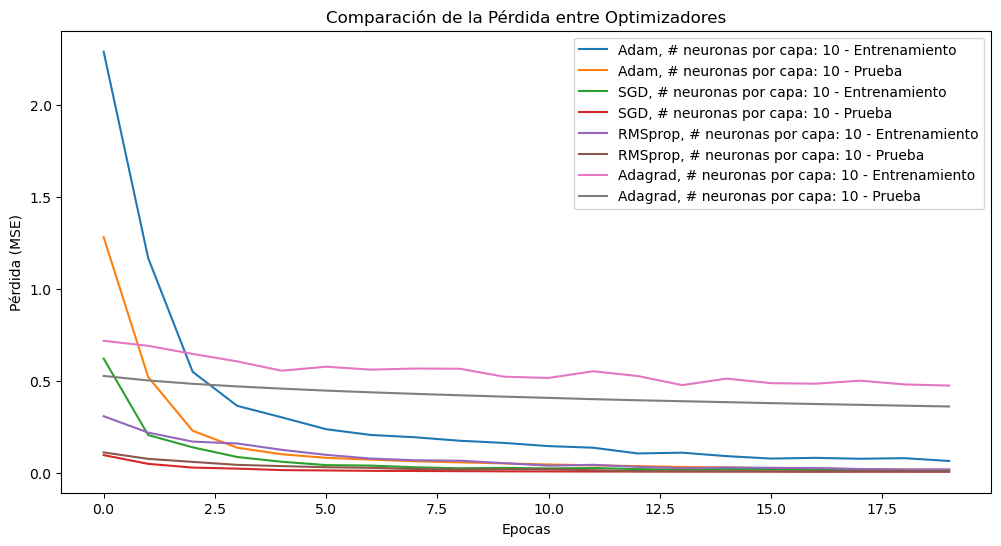

In [30]:
# Graficar la pérdida de cada modelo usando 2 neuronas en cada capa
plt.figure(figsize=(12, 6))
for nombre, resultado in resultados_dos_capas_reg.items():
    if( optimizador_mse_reg[-1] in nombre):
        plt.plot(resultado['historia'].history['loss'], label=f'{nombre} - Entrenamiento')
        plt.plot(resultado['historia'].history['val_loss'], label=f'{nombre} - Prueba')

plt.xlabel('Epocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Comparación de la Pérdida entre Optimizadores')
plt.show()

Con un dropout de 0.2 se observa que las neuronas por capa se establecen en 10 para la mayoría de optimizadores, excepto para Adam, sin embargo, ni el MSE ni el MAE mejoran en comparación con el dropout de 0.01.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

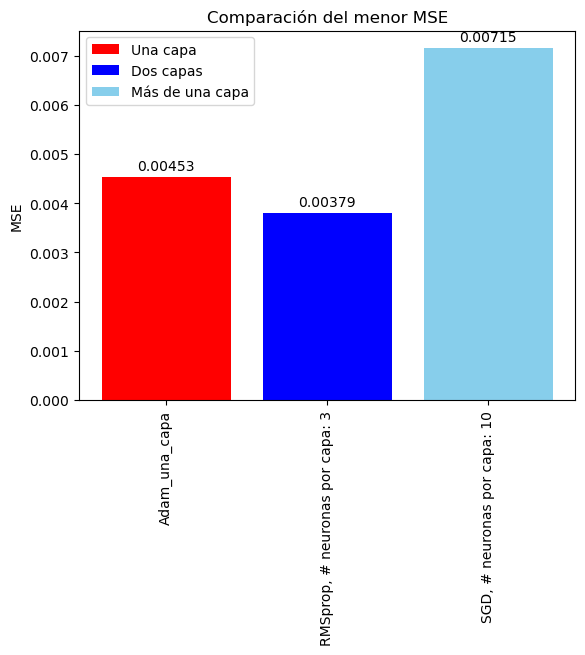

In [33]:
import matplotlib.pyplot as plt

# Optimizadores y sus valores de MSE
optimizadores = [optimizador_mse_una_capa, optimizador_mse, optimizador_mse_reg]
menores_mse = [menor_mse_una_capa, menor_mse, menor_mse_reg]


fig, ax = plt.subplots()


ax.set_title("Comparación del menor MSE")

barras = ax.bar(optimizadores, menores_mse, color=['red', 'blue', 'skyblue'], label=['Una capa', 'Dos capas', 'Más de una capa'])


ax.set_xticklabels(optimizadores, rotation=90)
ax.set_ylabel('MSE')


for barra in barras:
    height = barra.get_height()
    ax.annotate('{}'.format(round(height, 5)),
                xy=(barra.get_x() + barra.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')


ax.legend()


plt.show()


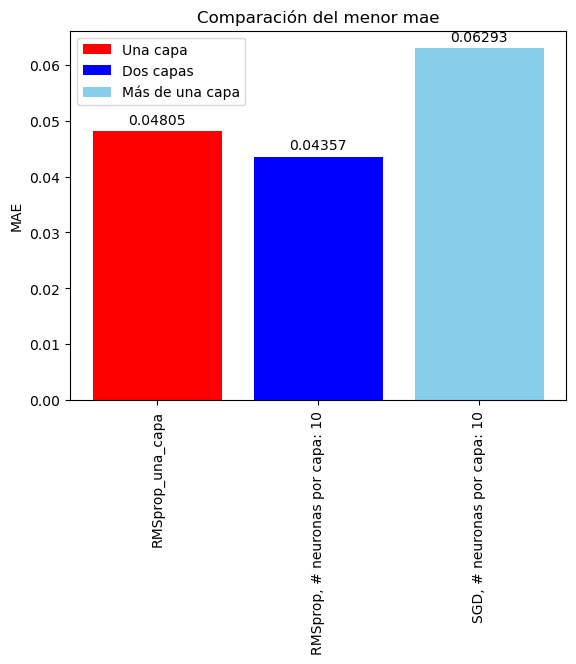

In [34]:
import matplotlib.pyplot as plt

# Optimizadores y sus valores de mae
optimizadores = [optimizador_mae_una_capa, optimizador_mae, optimizador_mae_reg]
menores_mae = [menor_mae_una_capa, menor_mae, menor_mae_reg]

optimizador_mae, menor_mae


fig, ax = plt.subplots()


ax.set_title("Comparación del menor mae")


barras = ax.bar(optimizadores, menores_mae, color=['red', 'blue', 'skyblue'], label=['Una capa', 'Dos capas', 'Más de una capa'])


ax.set_xticklabels(optimizadores, rotation=90)
ax.set_ylabel('MAE')


for barra in barras:
    height = barra.get_height()
    ax.annotate('{}'.format(round(height, 5)),
                xy=(barra.get_x() + barra.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')


ax.legend()


plt.show()

Con base a los anteriores resultados se puede analizar que de los de tipos de redes neuronales anteriores, se obtuvo el siguiente resultado: 



El modelo de una capa, el que menor tuvo un mse dentro de los optimizadores aplicados es Adam con un MSE de 0.00453 y un RMSprop MAE de 0.04805, de las dos capas fue RMSprop # de neuronas por capas : 3 con un MSE de 0.00379 y MAE de 0.04357 y de las dos capas mas reg fue SGD con # neuronas por capa:10 un MSE de 0.00715 y MAE de 0.06293. Por lo tanto, con base a estos tres modelos, el que tuvo un mejor rendimiento es dos capas con el optimizador RMSprop # de neuronas por capas : 3, ya que logra los menores MSE y MAE en el conjunto de prueba.

Ventajas del mejor modelo en este caso dos capas-RMSprop, en este se puede evidenciar un MAE, demostrando que tiene una mejor predicción en el conjunto de prueba como se demuestra tambien con el MSE que se puede evidenciar que tiene a estar más cerca a los valores reales, siendo más preciso.

Desventajas del modelo con menor desempeño dos capas+reg-SGD, # de neuronas por cada: 10, al tener el MSE y MAE más alto se alejan las predicciones de los valores reales, al momento de aumentar la complejidad del modelo con más neuronas se puede presentar un sobreajuste en los datos de entrenamiento 